In [95]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted',color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

In [96]:
from sklearn.metrics import r2_score, accuracy_score,confusion_matrix,mean_squared_error,silhouette_score 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, OrdinalEncoder, MinMaxScaler,StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier 
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [97]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-5-hcv.csv')
data.head(1)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


In [98]:
mis_col = data.isna().sum() * 100/len(data)
mis_col.sort_values(ascending=False)

ALP           2.926829
CHOL          1.626016
ALB           0.162602
ALT           0.162602
PROT          0.162602
Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
AST           0.000000
BIL           0.000000
CHE           0.000000
CREA          0.000000
GGT           0.000000
dtype: float64

In [99]:
mean_imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
mode_imp = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

mis_num = ['ALP', 'CHOL', 'ALB', 'ALT', 'PROT']
data[mis_num] = mean_imp.fit_transform(data[mis_num])

In [100]:
data.isna().sum() * 100/len(data)

Unnamed: 0    0.0
Category      0.0
Age           0.0
Sex           0.0
ALB           0.0
ALP           0.0
ALT           0.0
AST           0.0
BIL           0.0
CHE           0.0
CHOL          0.0
CREA          0.0
GGT           0.0
PROT          0.0
dtype: float64

In [101]:
data.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [102]:
le = LabelEncoder()
data.Category = le.fit_transform(data.Category)
data.Sex = le.fit_transform(data.Sex)
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,4,62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,4,64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,4,46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [103]:
data.corr()['Category'].sort_values(ascending=False)

Category    1.000000
AST         0.648341
BIL         0.473006
GGT         0.471164
CREA        0.182040
ALT         0.106369
Age         0.106341
Sex         0.060657
ALP         0.028488
PROT        0.007160
ALB        -0.285467
CHOL       -0.300254
CHE        -0.329472
Name: Category, dtype: float64

<AxesSubplot:title={'center':'Correlation Matrix'}>

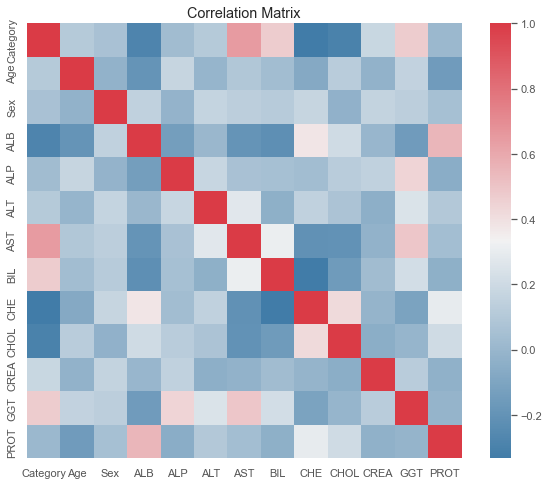

In [104]:
f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')
data_corr = data.corr()

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_),cmap=sns.diverging_palette(240,10, as_cmap=True),square=True, ax=ax)

<AxesSubplot:xlabel='CHOL', ylabel='Count'>

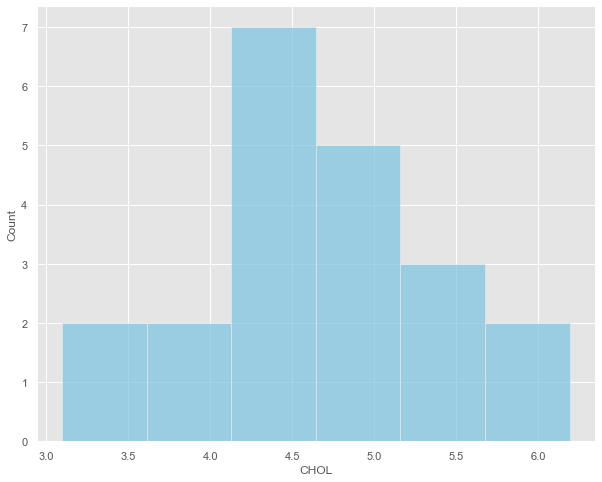

In [105]:
f,ax = plt.subplots(figsize=(10,8)) 

sns.histplot(data[(data.Category == 3)]['CHOL'],ax=ax, color='c')

In [106]:
data.head(1)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


In [107]:
x = data.drop(columns=['Category'], axis=1)
y = data.Category

In [108]:
num_val = ['Age', 'ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']
cat_val = ['Sex']

In [109]:
col_trans = ColumnTransformer([ 
    ('num', StandardScaler(), num_val),
    ('cat', OrdinalEncoder(), cat_val)
])

x = pd.DataFrame(col_trans.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.533616,-0.540647,-0.616004,-0.816054,-0.383693,-0.198236,-0.574734,-1.904676,0.497070,-0.502286,-0.564372,1.0
1,-1.533616,-0.540647,0.078682,-0.410992,-0.305057,-0.381375,1.349161,-0.506078,-0.146590,-0.438203,0.826102,1.0
2,-1.533616,0.914850,0.250402,0.304747,0.538767,-0.269457,0.291926,-0.149747,0.094783,-0.115957,1.345212,1.0
3,-1.533616,0.273738,-0.635517,0.084520,-0.368571,0.381706,-0.393234,-0.559528,-0.025903,-0.104971,0.677784,1.0
4,-1.533616,-0.419356,0.226986,0.163172,-0.302033,-0.091404,0.432588,-0.933675,-0.106361,-0.176378,-0.619991,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.666925,13.593832,-0.886841,2.283879,1.963828,-1.191832,0.830162,-0.514683,11.193789,-0.657071,0.0
611,1.651437,-3.053113,1.347069,-1.004820,0.290761,0.437665,-3.020439,-2.091750,-0.367848,-0.066521,-0.137960,0.0
612,1.651437,-2.186746,0.742146,-0.981225,1.942115,1.862083,-2.965989,-1.548345,-0.293425,0.451636,1.845783,0.0
613,-0.140155,-1.493652,0.000000,0.414861,0.823066,0.437665,-2.103866,-1.040574,-0.589106,0.191642,-0.193579,0.0


In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [111]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

accu_scr = accuracy_score(y_test,y_pred)

mod_per = pd.DataFrame([ 
    'LogisticRegression', accu_scr
]).transpose()
mod_per.columns = ['Method', 'Accuracy Test']
mod_per

,Method,Accuracy Test
0,LogisticRegression,0.886486


<AxesSubplot:xlabel='predicted Values', ylabel='True Values'>

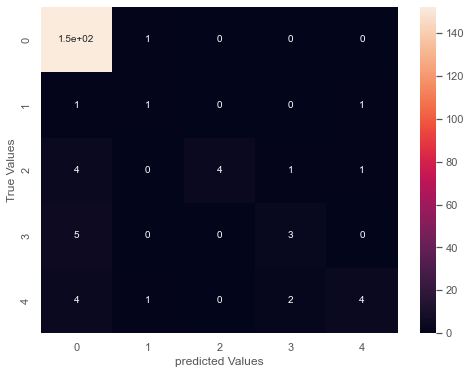

In [112]:
cm_dic = { 
    'y_test': y_test,
    'y_pred':y_pred
}

cm_cols = pd.DataFrame(
    cm_dic, columns=['y_test', 'y_pred']
)
confusion_matrix = pd.crosstab(cm_cols['y_test'], cm_cols['y_pred'], rownames=['True Values'], colnames=['predicted Values'])

f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix,annot=True)

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

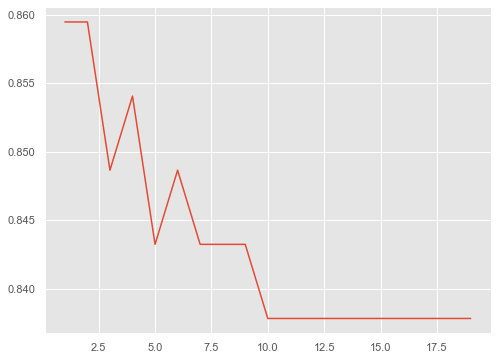

In [115]:
accuracies = []

for N in range(1,20):

    knn = KNeighborsClassifier(n_neighbors=N)

    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
    accuracies.append(accu)

accuracies = np.array(accuracies)

f,ax = plt.subplots(figsize=(8,6))
sns.lineplot(np.arange(1,20),accuracies)

In [118]:
best_k = 1 + np.argmax(accuracies)
best_accuracy = np.max(accuracies)

ac_perf = pd.DataFrame([
    'KNeighborsClassifier', best_k, best_accuracy
]).transpose()
ac_perf.columns = ['Method', 'Best K', 'Best Accuracy']
ac_perf

,Method,Best K,Best Accuracy
0,KNeighborsClassifier,1,0.859459
